# 🏹 Graficando campos vectoriales

## Pablo Zurita Soler (pzurita@uc.cl)

La librería `matplotlib` provee el comando `quiver` que permite graficar flechas con ciertas coordenadas que la definen, ubicadas en ciertas coordenadas. Consideremos, por ejemplo, el campo

$$
    \mathbf{f}(\mathbf{x}) = \begin{pmatrix} \frac{\sqrt{x_{1}}}{2} \\ x_{2} \end{pmatrix}
$$

y supongamos que este campo actúa sobre una región $\Omega = [0, 5] \times [-1, 1]$, pero queremos graficar su efecto solo en la frontera derecha de la región.

Veamos primero cómo graficar la región. De partida, siempre hay que importar lo necesario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Hay muchos estilos para usar, a mí me gusta ggplot 😊

Creemos una grilla de $\Omega$.

In [2]:
x = np.linspace(0, 5, 100)
y = np.linspace(-0.5, 0.5, 500)

xx, yy = np.meshgrid(x, y)

Plotearemos una discretización, aunque hay comandos, como `np.fill`, para figuras rellenas 👀.

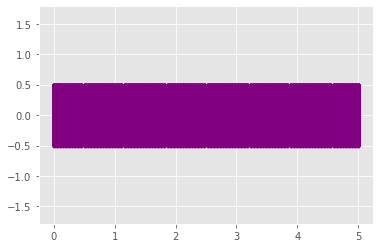

In [3]:
plt.figure()
plt.plot(xx, yy, '.', color='purple')
plt.axis('equal')
plt.show()

La grilla es suficientemente _fina_ como para que se vea continuo. Qué tan fina es una grilla o una discretización se refiere al tamaño de los segmentos discretos: mientras más pequeños, más fina es. Es importante saber que mientras más fina sea la discretización, mayor resolución tendrán los campos graficados sobre ella 🎨.

¿Qué pasa si queremos graficar $\mathbf{f}$? Por supuesto, necesitamos un arreglo que contenga los valores de $\mathbf{f}$ que nos interesa graficar. Dijimos que queríamos el borde derecho de la región, así que... vamos a obtener una **grilla de la región de interés**. Por supuesto, podríamos obtener esto **seleccionando valores de la grilla original**, pero para efectos de este ejemplo, vamos a generar una nueva.

In [4]:
y_reshape = np.linspace(-0.5, 0.5, 5)
x_reshape = 5

xx_right, yy_right = np.meshgrid(x_reshape, y_reshape)

Ahora, necesitamos un arreglo que represente nuestro campo vectorial sobre la región de interés. Tomamos, entonces,

In [5]:
def f(x, y):
    return np.array([np.sqrt(x)/2, y])

ff = f(xx_right, yy_right)
ff.shape

(2, 5, 1)

Por último, utilizamos la función `quiver` para graficar. Notemos que, como la grilla sobre la que estamos graficando es más gruesa, se verán menos vectores. Graficaremos en la misma `figure` a la región, para verlas juntas. Además, ajustaremos los ejes del gráfico para, efectivamente, hacer un _zoom_ a la región de interés.

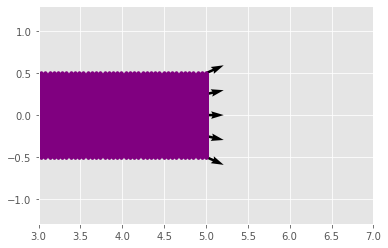

In [11]:
plt.figure()
plt.plot(xx, yy, '.', color='purple')
plt.quiver(xx_right, yy_right, *ff)  # * es para desempaquetar
plt.axis('equal')
plt.xlim(3, 7)
plt.show()